# Boundary Element Methods for 2D fault

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.animation import Animation, FuncAnimation, ArtistAnimation
from IPython.display import HTML
import matplotlib as mpl

/Users/spc/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load the data

In [2]:
with h5py.File('./bem3d_solution.h5') as f:
    d = f['bem3d']
    t = np.array(d['t'])
    velocity = np.array(d['velocity'])
    state = np.array(d['state'])

## Max slip rate across the fault plane

In [3]:
maxv = np.zeros_like(t)
for i in range(t.size):
    maxv[i] = np.max(velocity[i,:,:])

Text(0,0.5,'Max velocity log10(m/s)')

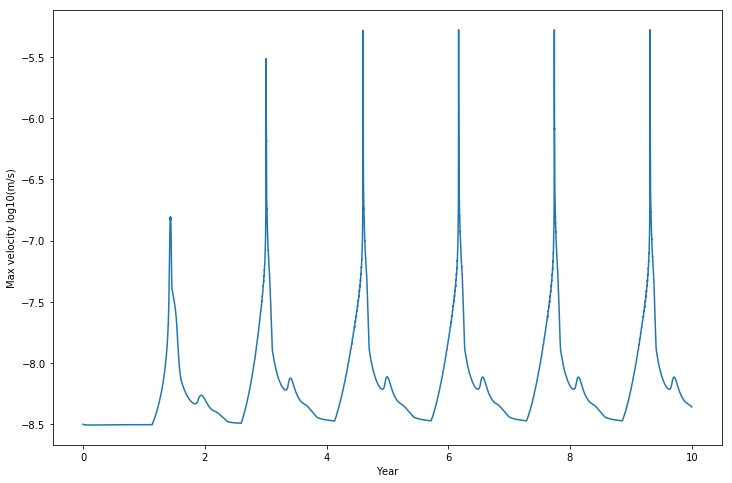

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(t, np.log10(maxv))
ax.set_xlabel('Year')
ax.set_ylabel('Max velocity log10(m/s)')

## Plot 2D velocity

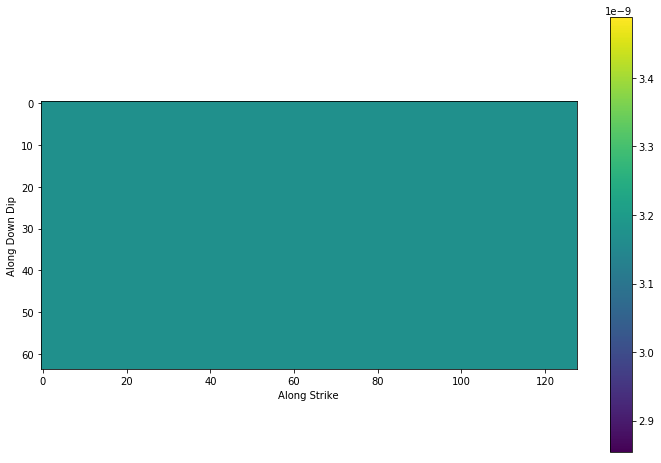

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
im = ax.imshow(velocity[0,:,:])
cb = fig.colorbar(im, ax=ax)

def init():
    ax.set_xlabel('Along Strike')
    ax.set_ylabel('Along Down Dip')
    return [im]
    
def update(frame):
    ax.set_title('Year: {:.6f}'.format(t[frame]))
    ax.imshow(velocity[frame,:,:], vmin=1e-9, vmax=1e-5)
    return [im]
    
ani = FuncAnimation(fig, update, frames=np.arange(0, t.size, 10), init_func=init, blit=True, interval=10);

In [27]:
mpl.rcParams['animation.embed_limit'] = 100
HTML(ani.to_jshtml())

In [7]:
ani.save('bem3d.mp4')